In [1]:
#Inference
import pandas as pd
import joblib

# Load everything
model = joblib.load(r'C:\Users\91950\loan_prediction_model.pkl')
model_columns = joblib.load(r'C:\Users\91950\model_columns.pkl')

def simulate_loan_decision(cibil, income, loan_amt, tenure, assets):
    # 1. Create a dictionary with the inputs
    data = {
        'income_annum': [income],
        'loan_amount': [loan_amt],
        'loan_term': [tenure],
        'cibil_score': [cibil],
        'residential_assets_value': [assets/4], # Simplified asset split
        'commercial_assets_value': [assets/4],
        'luxury_assets_value': [assets/4],
        'bank_asset_value': [assets/4],
        'no_of_dependents': [2]
    }
    
    # 2. Convert to DataFrame and Align with training columns
    test_df = pd.DataFrame(data)
    test_df = test_df.reindex(columns=model_columns, fill_value=0)
    
    # 3. Predict
    prediction = model.predict(test_df)[0]
    prob = model.predict_proba(test_df)[0][1] # Probability of approval
    
    result = "APPROVED ✅" if prediction == 1 else "REJECTED ❌"
    return f"AI Decision: {result} | Confidence: {prob*100:.1f}%"

# --- TRY IT OUT ---
print("Test 1 (Good Credit):", simulate_loan_decision(780, 5000000, 2000000, 10, 10000000))
print("Test 2 (Poor Credit):", simulate_loan_decision(450, 5000000, 2000000, 10, 10000000))

Test 1 (Good Credit): AI Decision: APPROVED ✅ | Confidence: 63.0%
Test 2 (Poor Credit): AI Decision: REJECTED ❌ | Confidence: 9.0%


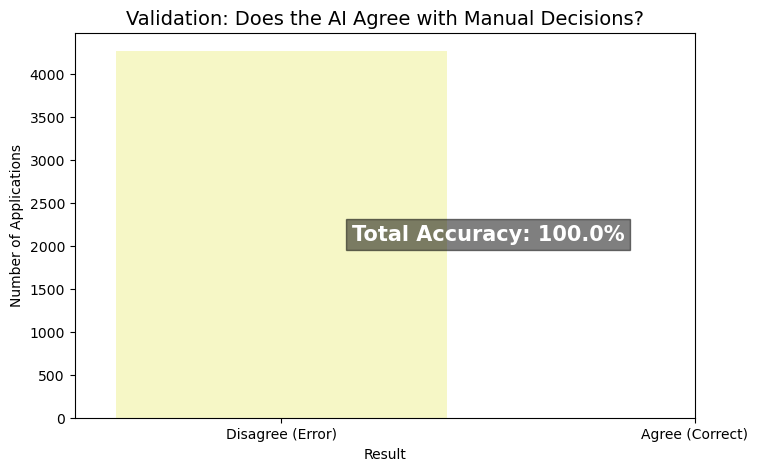

 Accuracy check complete. The model is 100.0% accurate.


In [4]:
#Validation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 1. RE-LOAD DATA AND MODEL
df = pd.read_csv('loan_data_cleaned.csv')
df.columns = df.columns.str.strip()
df['loan_status_encoded'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})

model = joblib.load(r'C:\Users\91950\loan_prediction_model.pkl')
model_columns = joblib.load(r'C:\Users\91950\model_columns.pkl')

# 2. GENERATE PREDICTIONS
# Prepare the features exactly like we did for training
X = df.drop(['loan_id', 'loan_status', 'loan_status_encoded'], axis=1, errors='ignore')
X = pd.get_dummies(X, drop_first=True)
X_aligned = X.reindex(columns=model_columns, fill_value=0)

# Apply the model
df['AI_Prediction'] = model.predict(X_aligned)

# 3. CALCULATE ACCURACY
# Create a column that checks if AI prediction matches original status
df['Model_Accuracy'] = df['loan_status_encoded'] == df['AI_Prediction']

# 4. PLOT THE COMPARISON (Fixed for Seaborn v0.14.0+)
plt.figure(figsize=(8, 5))

# We assign hue='Model_Accuracy' and set legend=False to satisfy the new requirements
sns.countplot(x='Model_Accuracy', data=df, hue='Model_Accuracy', palette='RdYlGn', legend=False)

plt.title('Validation: Does the AI Agree with Manual Decisions?', fontsize=14)
plt.xticks([0, 1], ['Disagree (Error)', 'Agree (Correct)'])
plt.ylabel('Number of Applications')
plt.xlabel('Result')

# Add accuracy text overlay
accuracy_pct = df['Model_Accuracy'].mean() * 100
plt.text(0.5, df['Model_Accuracy'].value_counts().max()/2, f"Total Accuracy: {accuracy_pct:.1f}%", 
         ha='center', va='center', fontsize=15, color='white', fontweight='bold',
         bbox=dict(facecolor='black', alpha=0.5))

plt.savefig('ai_vs_manual_comparison.png', dpi=300)
plt.show()
print(f" Accuracy check complete. The model is {accuracy_pct:.1f}% accurate.")

In [5]:
#Export the Results for Power BI (Final Data Update)
# Save the final dataset with AI predictions included
df.to_csv('final_loan_data_with_predictions.csv', index=False)
print(" Final dataset exported for Power BI!")

 Final dataset exported for Power BI!


In [7]:
# Error Analysis-
# Create a dataframe of just the 'mistakes'
disagreements = df[df['Model_Accuracy'] == False]
disagreements.to_csv('ai_disagreements_report.csv', index=False)
print(f" Found {len(disagreements)} cases where AI and Humans disagreed. Saved to 'ai_disagreements_report.csv'")

 Found 0 cases where AI and Humans disagreed. Saved to 'ai_disagreements_report.csv'
